<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Smart Supply Chain </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         February 2023, Paris | © Saeed VARASTEH
    </span>
</div>

### Part 05 - Exercises 02 : The Forecast Competition

---
<img src="images/competition.png" style="width:100px; position:absolute; top:-10px; right:0;"/>

__Objective__: Predict three months of item sales at different stores.

__Dataset description__

You are given a file named `store_sales.csv`:

    date - Date
    store - Store ID
    item - Item ID
    sales - Number of items sold at a particular store on a particular date.
    


### Import data and modules

#### Import modules

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

#### Import data

In [461]:
sales = pd.read_csv('./data/store/store_sales.csv')
print(sales.shape)
sales.head(5)

(913000, 4)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


## <span style="color:steelblue;">  Data Exploration  </span>


#### The data in the sales dataset are from which period?

__Hint:__ find the minimum and the maximum of the date.<br/>
__Hint:__ do not forget to convert the `date` column into datetime.

In [462]:
# YOUR CODE
sales['date'] = pd.to_datetime(sales['date'], format="%Y-%m-%d")
sales.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [463]:
print(sales['date'].min())
print(sales['date'].max())

2013-01-01 00:00:00
2017-12-31 00:00:00


#### How many unique items and stores are in the dataset?

In [464]:
# YOUR CODE
sales['item'].unique().sum()

1275

In [465]:
# YOUR CODE
sales['store'].unique().sum()

55

#### Plot average monthly sales for the item_id == 10 at store_id == 1

In [466]:
# YOUR CODE
item_10_1 = sales.loc[(sales['item']==10) & (sales['store']==1), ['date','sales']].set_index('date')

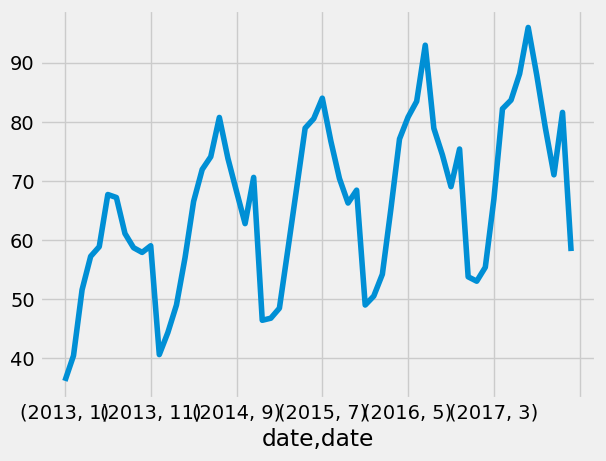

In [467]:
item_10_1.groupby([item_10_1.index.year,item_10_1.index.month])['sales'].mean().plot();

In [468]:
item_10_1.head()

,sales
date,
2013-01-01,37
2013-01-02,34
2013-01-03,32
2013-01-04,45
2013-01-05,35


---

## <span style="color:steelblue;">  Machine Learning for Time Series Forecasting  </span>


### <span style="color:DarkGray;">  Data preprocessing and Feature engineering  </span>

#### Extract some useful features (e.g. lag, rolling mean, datetime) to use in a machine learning model and them to the `sales` DataFrame.

In [469]:
# YOUR CODE
sales["lag_28"] = sales[["date","sales"]].groupby("date")["sales"].shift(70)

In [470]:
# YOUR CODE
sales["rmean_7"] = sales[["date", "sales"]].groupby("date")["sales"].transform(lambda x : x.rolling(2).mean())

In [471]:
# YOUR CODE
sales['quarter'] = sales['date'].dt.quarter.astype("int16")
sales['month'] = sales['date'].dt.month.astype("int16")
sales['day'] = sales['date'].dt.day.astype("int16")
sales['week'] = sales['date'].dt.weekofyear.astype("int16")
sales['weekday'] = sales['date'].dt.weekday.astype("int16")

In [472]:
sales.head()

,date,store,item,sales,lag_28,rmean_7,quarter,month,day,week,weekday
0,2013-01-01,1,1,13,NaN,NaN,1,1,1,1,1
1,2013-01-02,1,1,11,NaN,NaN,1,1,2,1,2
2,2013-01-03,1,1,14,NaN,NaN,1,1,3,1,3
3,2013-01-04,1,1,13,NaN,NaN,1,1,4,1,4
4,2013-01-05,1,1,10,NaN,NaN,1,1,5,1,5


In [473]:
sales.head()

,date,store,item,sales,lag_28,rmean_7,quarter,month,day,week,weekday
0,2013-01-01,1,1,13,NaN,NaN,1,1,1,1,1
1,2013-01-02,1,1,11,NaN,NaN,1,1,2,1,2
2,2013-01-03,1,1,14,NaN,NaN,1,1,3,1,3
3,2013-01-04,1,1,13,NaN,NaN,1,1,4,1,4
4,2013-01-05,1,1,10,NaN,NaN,1,1,5,1,5


In [474]:
sales.fillna(sales.mean(),inplace=True)

In [475]:
sales

,date,store,item,sales,lag_28,rmean_7,quarter,month,day,week,weekday
0,2013-01-01,1,1,13,52.914381,52.2608,1,1,1,1,1
1,2013-01-02,1,1,11,52.914381,52.2608,1,1,2,1,2
2,2013-01-03,1,1,14,52.914381,52.2608,1,1,3,1,3
3,2013-01-04,1,1,13,52.914381,52.2608,1,1,4,1,4
4,2013-01-05,1,1,10,52.914381,52.2608,1,1,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,41.000000,57.5000,4,12,27,52,2
912996,2017-12-28,10,50,59,47.000000,66.0000,4,12,28,52,3
912997,2017-12-29,10,50,74,52.000000,71.0000,4,12,29,52,4
912998,2017-12-30,10,50,62,58.000000,62.0000,4,12,30,52,5


### <span style="color:DarkGray;">  Train and test split  </span>

#### Split sales data into the __train__ and __test__ datasets. 

In [476]:
split_date = "2017-10-01"

In [477]:
train = sales.loc[sales.date < split_date].copy()
test = sales.loc[sales.date >= split_date].copy()

In [478]:
print(train.shape)
print(test.shape)

(867000, 11)
(46000, 11)


In [479]:
train

,date,store,item,sales,lag_28,rmean_7,quarter,month,day,week,weekday
0,2013-01-01,1,1,13,52.914381,52.2608,1,1,1,1,1
1,2013-01-02,1,1,11,52.914381,52.2608,1,1,2,1,2
2,2013-01-03,1,1,14,52.914381,52.2608,1,1,3,1,3
3,2013-01-04,1,1,13,52.914381,52.2608,1,1,4,1,4
4,2013-01-05,1,1,10,52.914381,52.2608,1,1,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...
912903,2017-09-26,10,50,79,53.000000,80.5000,3,9,26,39,1
912904,2017-09-27,10,50,80,63.000000,79.0000,3,9,27,39,2
912905,2017-09-28,10,50,82,65.000000,77.5000,3,9,28,39,3
912906,2017-09-29,10,50,90,81.000000,89.5000,3,9,29,39,4


In [480]:
test

,date,store,item,sales,lag_28,rmean_7,quarter,month,day,week,weekday
1734,2017-10-01,1,1,21,52.914381,52.2608,4,10,1,39,6
1735,2017-10-02,1,1,12,52.914381,52.2608,4,10,2,40,0
1736,2017-10-03,1,1,18,52.914381,52.2608,4,10,3,40,1
1737,2017-10-04,1,1,15,52.914381,52.2608,4,10,4,40,2
1738,2017-10-05,1,1,20,52.914381,52.2608,4,10,5,40,3
...,...,...,...,...,...,...,...,...,...,...,...
912995,2017-12-27,10,50,63,41.000000,57.5000,4,12,27,52,2
912996,2017-12-28,10,50,59,47.000000,66.0000,4,12,28,52,3
912997,2017-12-29,10,50,74,52.000000,71.0000,4,12,29,52,4
912998,2017-12-30,10,50,62,58.000000,62.0000,4,12,30,52,5


#### Create input (`x`) and output (`y`) variables
Note: use __sales__ as the output column.

In [481]:
x_train = train.drop(columns=["sales","date"])
y_train = train["sales"]
x_test = test.drop(columns=["sales","date"])
y_test = test["sales"]

In [482]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(867000, 9) (867000,)
(46000, 9) (46000,)


In [483]:
x_train

,store,item,lag_28,rmean_7,quarter,month,day,week,weekday
0,1,1,52.914381,52.2608,1,1,1,1,1
1,1,1,52.914381,52.2608,1,1,2,1,2
2,1,1,52.914381,52.2608,1,1,3,1,3
3,1,1,52.914381,52.2608,1,1,4,1,4
4,1,1,52.914381,52.2608,1,1,5,1,5
...,...,...,...,...,...,...,...,...,...
912903,10,50,53.000000,80.5000,3,9,26,39,1
912904,10,50,63.000000,79.0000,3,9,27,39,2
912905,10,50,65.000000,77.5000,3,9,28,39,3
912906,10,50,81.000000,89.5000,3,9,29,39,4


In [484]:
x_test

,store,item,lag_28,rmean_7,quarter,month,day,week,weekday
1734,1,1,52.914381,52.2608,4,10,1,39,6
1735,1,1,52.914381,52.2608,4,10,2,40,0
1736,1,1,52.914381,52.2608,4,10,3,40,1
1737,1,1,52.914381,52.2608,4,10,4,40,2
1738,1,1,52.914381,52.2608,4,10,5,40,3
...,...,...,...,...,...,...,...,...,...
912995,10,50,41.000000,57.5000,4,12,27,52,2
912996,10,50,47.000000,66.0000,4,12,28,52,3
912997,10,50,52.000000,71.0000,4,12,29,52,4
912998,10,50,58.000000,62.0000,4,12,30,52,5


### <span style="color:DarkGray;"> Model training and validation </span>

#### Train a  model on the train and validate your model on the test dataset (report your SMAPE score)

In [485]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

#### Linear Regression model

In [486]:
%%time
from sklearn.linear_model import LinearRegression

# Fitting the model on train
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Evaluating with SMAPE
print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

LR SMAPE: 14.978802289022445
CPU times: user 219 ms, sys: 68 ms, total: 287 ms
Wall time: 391 ms


#### Your model

#### Plot store_id = 1, item_id == 10 actual sales data and their prediction from October 2017 to December 2017 (92 days).

In [490]:
# YOUR CODE
from sklearn.linear_model import SGDRegressor

# Fitting the model on train
model = SGDRegressor()
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Evaluating with SMAPE
print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

LR SMAPE: 31.15212758782328


---

In [494]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Fitting the model on train

model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Evaluating with SMAPE
print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

LR SMAPE: 19.90888981798113
